                                          MID-TERM PROJECT
 ECG(ElectroCardioGraphy)
 
  An ECG records the heart’s electrical impulses to infer an electrocardiograph, a reading that helps doctors learn more about the heart. This procedure is called an electrocardiogram. The machine simply uses the heart’s natural electricity to record data. The machine and the procedure are both fairly simple, but they have had huge implications for the field of cardiology.
  ECG is used to record heart's functioning in order to check the following conditions of the patient.
  -Heart Murmur
  -Arrhythmia
  -Miocardial Infarction
  In an ECG, six electrodes are clipped on the chest around the heart. Four more electrodes are attached on each arm and leg. The ten electrodes combine in twelve different approaches to read twelve different angles on the heart. When the heart depolarizes with each heart beat, the electrodes sense the minute electrical impulses on the skin that are created as a result. The impulses pass back to the machine where they are interpreted and printed on a graph.
 
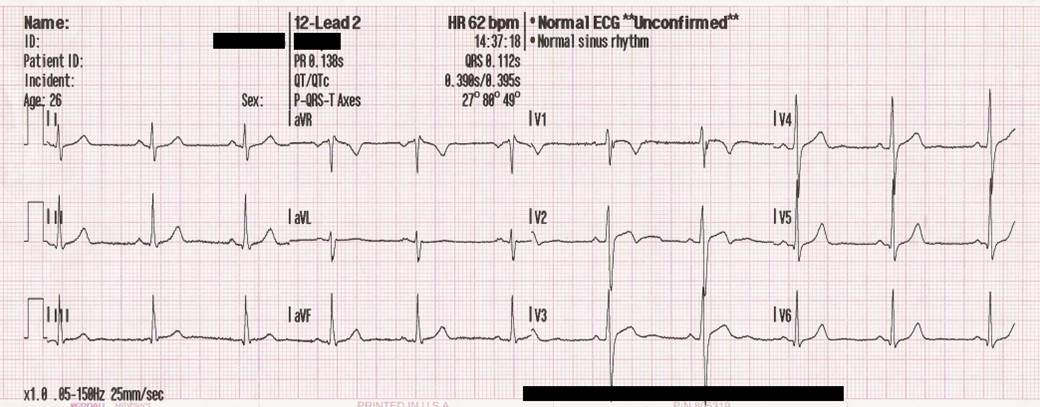



 The length of the file is: 43081

 The length of the time array is: 20000


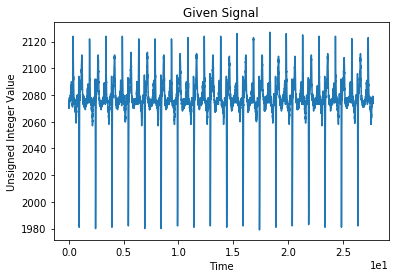

In [106]:
#initialize and use matplotlib (library) for plotting and we specify that we want those plots inline

# For the first time run
%matplotlib inline
#For Interactive mode run
#%matplotlib nbagg

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file
f = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) )
#we will now populate an array for the time which we now is 1/720Hz step for a total of 5000
x=np.arange(0,20000/0.000720e6,1/0.000720e6)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
#now we plot only the first line acquired (20000 samples)
plt.plot(x,AllSignal[:20000])
plt.title('Given Signal')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
f.close() #close the file


Given that a person at rest has an average heart rate between 60 and 100 beats per minute.Now,from the above plot we can infer that for 20000 samples we obtained ~19 beats.And we can make it that in order to obtain 5 beats the number of samples should be ~5555.The calculation is given below.

                             20000 samples - 18 beats
                             x samples     - 5 beats
                             
                             Hence, x =(20000 * 5)/18=5555.55 samples
                             
 Now lets check it by plotting the signal with 5555 samples                  


 The number of samples are 5555


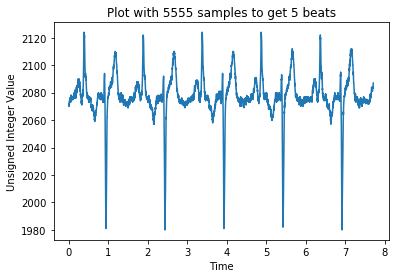

In [107]:
x=np.arange(0,5555/0.000720e6,1/0.000720e6)  #start,stop,step
print('\n The number of samples are ' + str(len(x)) )
#now we plot only the first line acquired (5555 samples)
plt.plot(x,AllSignal[:5555])
plt.title('Plot with 5555 samples to get 5 beats')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

  As it can be inferred from the above plot that there is approximately 3 beats per 5 seconds.It corresponds to approximately 36 beats per minute.Whereas the normal rate is considered to be 60 to 100 beats per minute.Hence I conclude that the heart rate is lower for this individual.
  
  The heart rate of this individual is approximately 36 to 40 beats per minute.
  
  Finding DFT:

$$ A_k=\sum_{m=0}^{n-1}a_m \exp \left(-2\pi i \frac{mk}{n} \right ) [k=0,...,n-1] $$
The above equation is refered from class notes.

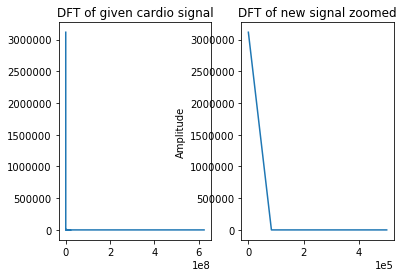

In [108]:
f=np.arange(0,1.25e9/2,1.25e9/15000)
Y=np.fft.fft(AllSignal[:15000])
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, Pyy[:7500])
plt.title('DFT of given cardio signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 500KHz
inx=np.where(f>0.5e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT of zoomed cardio signal')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

From the above spectrum the the maximum is observed at
and heart rate is approximately 40 beats/minute

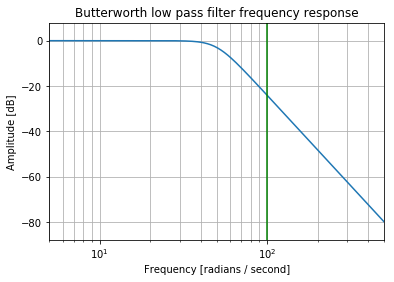

In [119]:
from scipy import signal
fs=0.0005e3
#Getting it ready to filter 100Hz with order 4 filter
b, a = signal.butter(4,100, 'low', analog=True)
w, h = signal.freqs(b, a)
wf=w*fs;
plt.plot(wf, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth low pass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

10


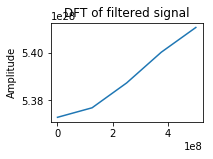

In [110]:
t=np.arange(0,12e-6,0.0008e-6) #time vector
FiltSignal=signal.lfilter(b,a,AllSignal[:10])
L=len(FiltSignal)
f=np.arange(0,1.25e9/2,1.25e9/10)
Y=np.fft.fft(FiltSignal)
Pyy=abs(Y)/L
print(len(Pyy))
plt.subplot(222)
plt.plot(f, Pyy[:5])
plt.title('DFT of filtered signal')
plt.ylabel('Amplitude')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

HEART RATE CALCULATION 

The heart rate is calculated as difference between R waves in ECG(R is the peak that can be seen in the image below). These  waves  are  filtrated  by band  pass  filters  firstly  and  then  the  signal  energy  is  computed.  The wave’s peaks are detected by peak detector or signal thresholding. 

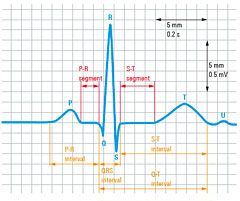

EFFECTS OF FILTER ON A ECG SIGNAL
 
 The effects of filters on the ECG clean signal are not so easy to visualise. Presicely, it is possible to get negative voltages out of a positive pulse waveform, and also peak to peak values exceeding the input. These effects cannot occur with a low pass filter.
 Any filters create distortion in the output signal. This distortion can be in amplitude or phase. Filters should not tolerate delays in real time.So the filter output exhibits non-linear characteristics due to their required shorter delays. Basically, they distort different frequencies differently causing phase distortion. If the filters were applied during post-processing, where real-time output of the signal is unnecessary, the design of these filters can be linear which minimizes phase distortion.

Low-pass filters on the ECG are used to remove high frequency muscle artifact and outside interference. They typically attenuate only the amplitude of higher frequency ECG components. Analog low-pass filtering has a noticeable affect on the QRS complex, epsilon, and J-waves but do not alter repolarization signals.

High-pass filters remove low-frequency components such as motion artifact, respiratory variation. Unlike low-pass filters, analog high-pass filters do not attenuate(reduction of amplitude) much of the signal. However, analog high-pass filters suffer from phase shift affecting the first 5 to 10 harmonics of the periodic signal. 

EFFECTS OF FILTERS ON ESTIMATION OF HEART RATE

 The effect of band pass filter is computationally intensive. Effect of the filter on the ECG signal
   -Heart rate detection with 1msec accuracy is obtainable with an analog band pass filter.
   -Digital filter with optimized frequency response is recommended. A 1 Hz or 2 Hz frequency is suggested which will cause the     filter to compute faster, and this should not affect the QRS detection significantly.
   -Researchers claim that high-pass filtering at 0.5 Hz does not cause significant changes in the shape of the ECG; at 1 Hz and     2 Hz cutoffs,considerable alterations can be seen in the ST segment and the T-wave, but not the QRS.

REFERENCES

1.http://www.ems12lead.com/2014/03/10/understanding-ecg-filtering/
2.http://www.medteq.info/med/ECGFilters
3.https://www.researchgate.net/publication/266281892_ECG_Signal_Processing_and_Heart_Rate_Frequency_Detection_Methods
4.https://www.biopac.com/wp-content/uploads/app233.pdf

IMAGE REFERENCES

1.https://www.rohde-schwarz.com/in/applications/capturing-small-ecg-signals-in-medical-applications-application-card_56279-152385.html
2.https://upload.wikimedia.org/wikipedia/commons/b/bd/12leadECG.jpg 

DONE BY

NAME   :VENKAT SAI MANOJ CHEERLA

S.ID   :0863427

S.MAIL : vcheerla@lakeheadu.ca

NOTES FOR EVALUATER

I hope everything asked is available in this notebook.The only problem I faced was in showing the complete spectrum,instead I found a limited range spectrum.I hope that doesnt make much difference while evaluating my project.